In [88]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

In [90]:
data_dir = pathlib.Path("E:\\GitHub\\images_dataset\\images_dataset")

batch_size = 32
img_height = 180
img_width = 180

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 5313 files belonging to 5 classes.
Using 4251 files for training.
Found 5313 files belonging to 5 classes.
Using 4251 files for training.
Found 5313 files belonging to 5 classes.
Using 1062 files for validation.
Classes: ['hoodie', 'pants', 'shirts', 'shoes', 'shorts']


In [91]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [92]:
num_classes = len(class_names)

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,023,877 (30.61 MB)

 Trainable params: 8,023,877 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 135s 809ms/step - accuracy: 0.5471 - loss: 1.1930 - val_accuracy: 0.8296 - val_loss: 0.4996
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8346 - loss: 0.4846 - val_accuracy: 0.8653 - val_loss: 0.4133
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 93s 693ms/step - accuracy: 0.8902 - loss: 0.3238 - val_accuracy: 0.8879 - val_loss: 0.3124
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 92s 694ms/step - accuracy: 0.9151 - loss: 0.2432 - val_accuracy: 0.8795 - val_loss: 0.3429
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 94s 707ms/step - accuracy: 0.9301 - loss: 0.1962 - val_accuracy: 0.9153 - val_loss: 0.2718
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 97s 727ms/step - accuracy: 0.9533 - loss: 0.1295 - val_accuracy: 0.9181 - val_loss: 0.2781
Epoch 7/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 90s 677ms/step - accuracy: 0.9536 - loss: 0.1304 - val_accuracy: 0.9143 - val_loss: 0.3327
Epoch 8/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 87s 656ms/step - accuracy: 0.9735 - loss: 0.

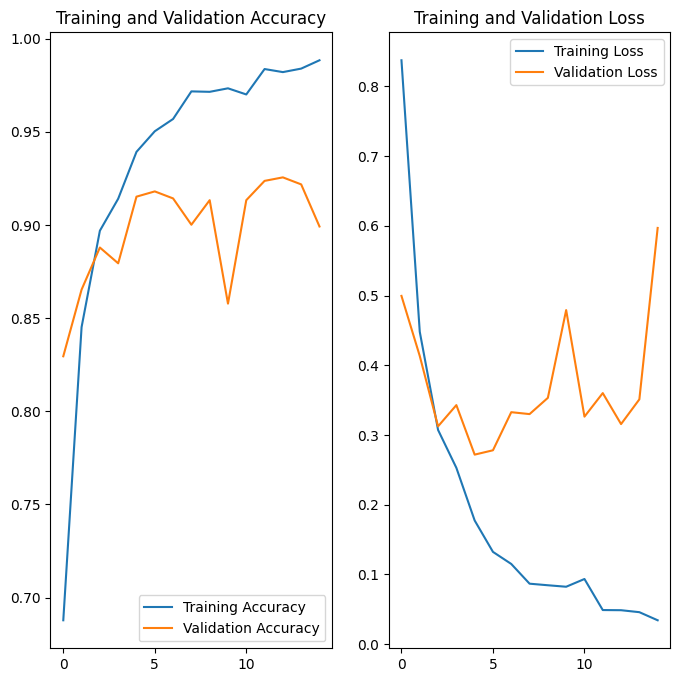

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [95]:
os.makedirs("E:\\GitHub\\images_dataset\\saved_model", exist_ok=True)
model.save("E:\\GitHub\\images_dataset\\saved_model\\image_classification_model.keras")

In [ ]:
model = load_model("E:\\GitHub\\images_dataset\\saved_model\\image_classification_model.keras")

In [106]:
img_path = "C:\\Users\\user\\Downloads\\1.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
This image most likely belongs to hoodie with a 40.46% confidence.
